analyze_chr_i(i) - i - индекс хромосомы с 0
строит графики:
- матрица расстояний, сгенерированная из pdb кривой (хитмап)
- плотность распределения количества бинов в зависимости от расстояния между ними (в мм)
- наблюдаемое значение hic в зависимости от расстояния между бинами,
BUCKETS_CNT - расмматриваем пары бинов, попадающие в один бакет по расстоянию между ними.
Внутри бакета значения hic усредняются и строится гистограмма.
Длина в мм одного бакета max(dist) - min(dist) / BUCKETS_CNT соответственно
- основной график анализа хромосомы.
Отлогарифмированный предыдущий график, зависимость ln(hic) от ln(dist), к нему применяется
линейная регрессия, после этого можно узнать коэффициенты зависимости между
hic и матрицей расстояний, сгенерированной из pdb файла

Предполагаемая зависимость
DIST[i][j] = 1 / HIC[i][j]^factor
factor = k^-1
i, j - любая пара бинов

Некоторые программы по типу 3DMax уже выдают оптимальный factor, с которым строилась кривая в pdb,
этот график также позволяет сравнить их распределение с заявленным

Также на этом графике прозрачным нарисована плотность распределения (координаты xs были отлогарифмированы для удобства
наложения графиков)

In [31]:
from main import analyze_chr_i

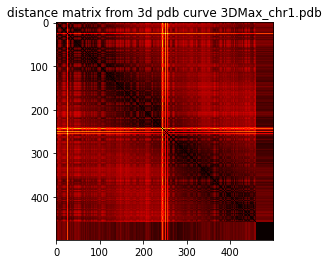

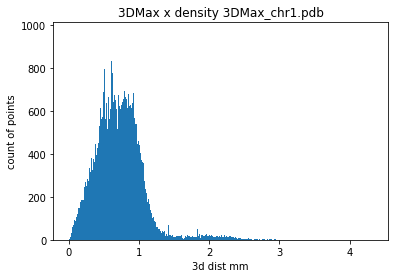

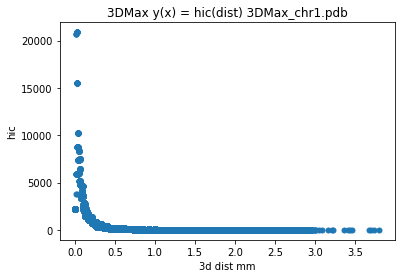

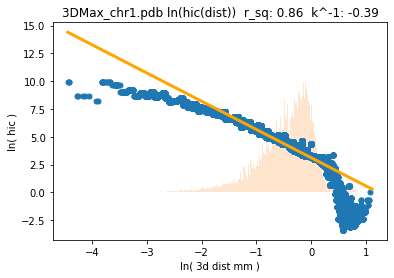

In [32]:
analyze_chr_i(0, file_name='3DMax_chr1.pdb')

Во время выполнения analyze_chr_i координаты из pdb домножаются так, чтобы длина последовательности
соответствовала реальной (в bp)
в scaled_pdb_files лежат pdb в правильном размере (todo: не доделан парсер по размеру точки, чтобы рисовало
нужно заменять последний 2 столбца, пока что делаю это руками)

в PDBUtils есть функции для перевода bp в мм и обратно

In [33]:
from PDBUtils import mm_to_bp, bp_to_mm

In [34]:
mm_to_bp(85)

249857083

In [35]:
bp_to_mm(138394717)

47.08111853772344

Коэффициент для перевода был получен с помощью скрипта data/mm_bp_corr.py, сами данные взяты из википедии
https://en.wikipedia.org/wiki/Human_genome
и продублированны
в data/mm_to_bp_wiki.txt

во время анализа же использую данные о длине bp из cool файла (длины там немного отличаются)
см. Cooler Api
https://cooler.readthedocs.io/en/latest/api.html

HiCExtractor - удобная обертка для получения нужных мне данных из Cooler API
chr_i_hic - получает нужные сведения об i'й хромосоме, а именно
- hic матрицу
- количество бинов
- длину генома в bp

In [36]:
from HiCExtractor import chr_i_hic

In [37]:
hic, bins_cnt, bp = chr_i_hic(filepath='chr/Rao2014-IMR90-MboI-allreps-filtered.500kb.cool', i=0)


Проделаем то же самое для 2й хромосомы, но для начала сгенерируем hic в удобном для 3DMax формате

In [38]:
from HiCExtractor import chr_i_hic_to_txt_adj

In [39]:
chr_i_hic_to_txt_adj(filepath='chr/Rao2014-IMR90-MboI-allreps-filtered.500kb.cool', i=1)


Проанализируем 2ю хромосму:

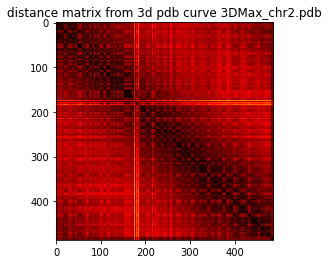

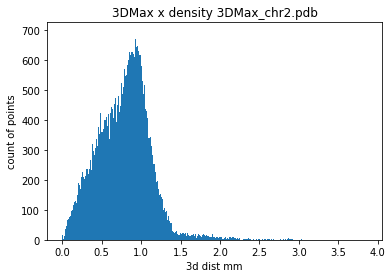

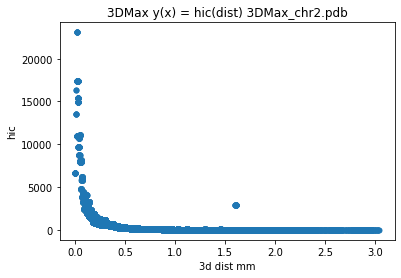

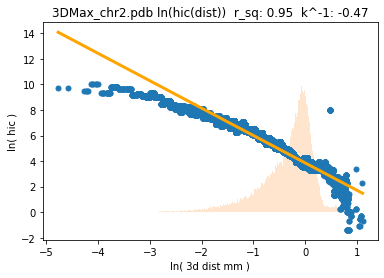

In [40]:
analyze_chr_i(1, file_name='3DMax_chr2.pdb')

2ю хромосому но с большим числом итераций в 3DMax

